In [1]:
#Importing required libraries
import pandas as pd 
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Scaling and Encoding libraries
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler


#Modeling libraries (for imputation of missing values)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR

In [2]:
movies_df=pd.read_csv('C:/Users/jdjra/OneDrive/Desktop/Internship/capstone/movies_df.csv')

In [3]:
movies_df

,Movie_Name,Duration_min,Year,Ratings,Metascore,Director1,Director2,Votes,Gross_collection_millions,Certification,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3
0,The Dark Knight,152,2008,9.0,84,Christopher Nolan,Not Available,2756999,534.86,PG-13,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama
1,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,Not Available,1905424,377.85,PG-13,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama
2,Spider-Man: Across the Spider-Verse,140,2023,8.9,86,Joaquim Dos Santos,Kemp Powers,200317,NaN,PG,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure
3,Inception,148,2010,8.8,74,Christopher Nolan,Not Available,2447577,292.58,PG-13,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi
4,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,Not Available,1933646,315.54,PG,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,Radhe,113,2021,1.9,7,Prabhu Deva,Not Available,179099,NaN,R,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller
1771,Race 3,160,2018,1.9,7,Remo D'Souza,Not Available,47867,1.69,PG-13,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller
1772,Angels Apocalypse,85,2015,1.6,7,Sean Cain,Enzo Zelocchi,42920,NaN,Not Available,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi
1773,The Cost of Deception,125,2021,1.5,7,Keith English,Not Available,39616,NaN,Not Available,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama


Data Preparation points: 
* Movie_Name: The "Movie_Name" column consists of unique values and doesn't provide significant predictive value for our models. Therefore, it will be omitted from our analysis.
* Directors: 
   * The movie dataset contains two columns, "Director1" and "Director2," for directors. However, the majority of movies have only one director listed. As a result, we will exclude the "Director2" column to streamline the data.
   * Director Selection: The "Director1" column encompasses a wide range of director names. To manage the complexity and maintain data quality, we will focus on the top 30 directors who have worked on the most movies.
   
* Certification: 
  * Certification data represents ordinal categorical information, providing insight into the age range of audiences that are suitable for watching the movies.
  * Therfore, we will be using Ordinal Encoder for encoding the data.

* Stars: 
   * Similarly, for the columns "Star1" and "Star2," which represent actors and actresses, we will concentrate on the top 30 stars with the highest number of movie appearances.
   * Additionally, we have decided to exclude the Star3 and Star4 columsn from our dataset as part of our data preparation process.

* Genres:
    *  We will apply one-hot encoding to the genre columns using a comprehensive list of all genres that appear in the dataset:
    * Genres includes:Action,' 'Animation,' 'Adventure,' 'Crime,' 'Comedy,' 'Drama,' 'Thriller,' 'Sci-Fi,' 'Horror,' 'Biography,' 'Mystery,' 'Fantasy,' 'War,' 'Not Available,' 'Sport,' 'Family,' 'History,' 'Romance,' 'Biography,' and 'Western.'
    * Additionally we will remove the 'Genre 3' column from the dataset.
* Votes & Gross Collection:
   * We will remove the movies with missing Gross_collection_million values.
   * These columns represent our target variables for two separate models. Currently, we won't perform scaling on these columns.    * However, during the modeling phase, we will apply scaling to ensure the effectiveness of our models.

In [4]:
movies_df=movies_df.drop(['Movie_Name','Director2','Star3','Star4','Genre3'],axis=1)
movies_df=movies_df.dropna(subset=['Gross_collection_millions'])
movies_df.reset_index(drop=True, inplace=True)
movies_df

,Duration_min,Year,Ratings,Metascore,Director1,Votes,Gross_collection_millions,Certification,Star1,Star2,Genre1,Genre2
0,152,2008,9.0,84,Christopher Nolan,2756999,534.86,PG-13,Christian Bale,Heath Ledger,Action,Crime
1,201,2003,9.0,94,Peter Jackson,1905424,377.85,PG-13,Elijah Wood,Viggo Mortensen,Action,Adventure
2,148,2010,8.8,74,Christopher Nolan,2447577,292.58,PG-13,Leonardo DiCaprio,Joseph Gordon-Levitt,Action,Adventure
3,178,2001,8.8,92,Peter Jackson,1933646,315.54,PG,Elijah Wood,Ian McKellen,Action,Adventure
4,179,2002,8.8,87,Peter Jackson,1719437,342.55,PG-13,Elijah Wood,Ian McKellen,Action,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...
1474,123,1998,4.9,32,John Landis,34217,13.98,PG,Dan Aykroyd,John Goodman,Action,Comedy
1475,150,2019,4.7,30,Ali Abbas Zafar,31802,2.97,PG-13,Salman Khan,Katrina Kaif,Action,Comedy
1476,102,1997,4.6,28,Raja Gosnell,122102,30.88,PG,Alex D. Linz,Olek Krupa,Action,Comedy
1477,87,1992,4.4,26,Roger Spottiswoode,43755,28.41,PG,Sylvester Stallone,Estelle Getty,Action,Comedy


In [5]:
#New Shape of Dataset
movies_df.shape

(1479, 12)

In [6]:
general_ratings = ['G', 'PG', 'PG-13','R','X', 'Rejected', 'Not Rated', 'Not Available']

Oencoder = OrdinalEncoder(categories=[general_ratings])

movies_df['Certification']= Oencoder.fit_transform(movies_df['Certification'].values.reshape(-1, 1))

In [7]:
movies_df

,Duration_min,Year,Ratings,Metascore,Director1,Votes,Gross_collection_millions,Certification,Star1,Star2,Genre1,Genre2
0,152,2008,9.0,84,Christopher Nolan,2756999,534.86,2.0,Christian Bale,Heath Ledger,Action,Crime
1,201,2003,9.0,94,Peter Jackson,1905424,377.85,2.0,Elijah Wood,Viggo Mortensen,Action,Adventure
2,148,2010,8.8,74,Christopher Nolan,2447577,292.58,2.0,Leonardo DiCaprio,Joseph Gordon-Levitt,Action,Adventure
3,178,2001,8.8,92,Peter Jackson,1933646,315.54,1.0,Elijah Wood,Ian McKellen,Action,Adventure
4,179,2002,8.8,87,Peter Jackson,1719437,342.55,2.0,Elijah Wood,Ian McKellen,Action,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...
1474,123,1998,4.9,32,John Landis,34217,13.98,1.0,Dan Aykroyd,John Goodman,Action,Comedy
1475,150,2019,4.7,30,Ali Abbas Zafar,31802,2.97,2.0,Salman Khan,Katrina Kaif,Action,Comedy
1476,102,1997,4.6,28,Raja Gosnell,122102,30.88,1.0,Alex D. Linz,Olek Krupa,Action,Comedy
1477,87,1992,4.4,26,Roger Spottiswoode,43755,28.41,1.0,Sylvester Stallone,Estelle Getty,Action,Comedy


In [8]:
top_directors = movies_df['Director1'].value_counts().index[:30] #Selecting top 30 directors (based on no. of movies)
top_stars1 = movies_df['Star1'].value_counts().index[:30] #Selecting top 30 stars (based on no. of movies)
top_stars2 = movies_df['Star2'].value_counts().index[:20] #Selecting top 20 stars (based on no. of movies)

# Assigniing OneHotEncoder rules for Director1, Star1 and Star2 columns
director_encoder = OneHotEncoder(categories=[top_directors], handle_unknown='ignore')
star1_encoder = OneHotEncoder(categories=[top_stars1], handle_unknown='ignore')
star2_encoder = OneHotEncoder(categories=[top_stars2], handle_unknown='ignore')

# For Director1 column
director_encoded = director_encoder.fit_transform(movies_df[['Director1']])
director_encoded_df = pd.DataFrame(director_encoded.toarray(), columns=director_encoder.get_feature_names_out(['Director1']))

# For Star1 column
star1_encoded = star1_encoder.fit_transform(movies_df[['Star1']])
star1_encoded_df = pd.DataFrame(star1_encoded.toarray(), columns=star1_encoder.get_feature_names_out(['Star1']))

# For Star2 column
star2_encoded = star2_encoder.fit_transform(movies_df[['Star2']])
star2_encoded_df = pd.DataFrame(star2_encoded.toarray(), columns=star2_encoder.get_feature_names_out(['Star2']))

# Concatenating the encoded DataFrames
encoded_df = pd.concat([movies_df, director_encoded_df, star1_encoded_df, star2_encoded_df], axis=1)

# Droppign the original "Director1" and "Star1" columns
encoded_df.drop(['Director1', 'Star1','Star2'], axis=1, inplace=True)

In [9]:
encoded_df

,Duration_min,Year,Ratings,Metascore,Votes,Gross_collection_millions,Certification,Genre1,Genre2,Director1_Michael Bay,...,Star2_Hugh Jackman,Star2_Cate Blanchett,Star2_Morgan Freeman,Star2_Leonard Nimoy,Star2_Jason Statham,Star2_Jennifer Connelly,Star2_Jamie Foxx,Star2_Gene Hackman,Star2_Katrina Kaif,Star2_Liam Neeson
0,152,2008,9.0,84,2756999,534.86,2.0,Action,Crime,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,201,2003,9.0,94,1905424,377.85,2.0,Action,Adventure,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,148,2010,8.8,74,2447577,292.58,2.0,Action,Adventure,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,178,2001,8.8,92,1933646,315.54,1.0,Action,Adventure,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,179,2002,8.8,87,1719437,342.55,2.0,Action,Adventure,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,123,1998,4.9,32,34217,13.98,1.0,Action,Comedy,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1475,150,2019,4.7,30,31802,2.97,2.0,Action,Comedy,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1476,102,1997,4.6,28,122102,30.88,1.0,Action,Comedy,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1477,87,1992,4.4,26,43755,28.41,1.0,Action,Comedy,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
total_genre_list=['Action','Animation','Adventure','Crime','Comedy','Drama','Thriller','Sci-Fi','Horror','Mystery','Fantasy','War','Biography','Not Available','Sport','Family','History']

In [11]:
top_genres1 = movies_df['Genre1'].value_counts().index[:2] #Genre1 has only two values

# Assigniing OneHotEncoder rules for Genre1 and Genre2 columns
genre1_encoder = OneHotEncoder(categories=[top_genres1], drop='first')
genre2_encoder = OneHotEncoder(categories=[total_genre_list], drop='first')

# For Genre1 column
genre1_encoded = genre1_encoder.fit_transform(movies_df[['Genre1']])
genre1_encoded_df = pd.DataFrame(genre1_encoded.toarray(), columns=genre1_encoder.get_feature_names_out(['Genre1']))

# For Genre2 column
genre2_encoded = genre2_encoder.fit_transform(movies_df[['Genre2']])
genre2_encoded_df = pd.DataFrame(genre2_encoded.toarray(), columns=genre2_encoder.get_feature_names_out(['Genre2']))

# Concatenating the encoded DataFrames
encoded_df = pd.concat([encoded_df, genre1_encoded_df, genre2_encoded_df], axis=1)

# Dropping the original Genre1 and Genre2 columsn
encoded_df.drop(['Genre1', 'Genre2'], axis=1, inplace=True)


In [12]:
encoded_df

,Duration_min,Year,Ratings,Metascore,Votes,Gross_collection_millions,Certification,Director1_Michael Bay,Director1_Tony Scott,Director1_Steven Spielberg,...,Genre2_Sci-Fi,Genre2_Horror,Genre2_Mystery,Genre2_Fantasy,Genre2_War,Genre2_Biography,Genre2_Not Available,Genre2_Sport,Genre2_Family,Genre2_History
0,152,2008,9.0,84,2756999,534.86,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,201,2003,9.0,94,1905424,377.85,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,148,2010,8.8,74,2447577,292.58,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,178,2001,8.8,92,1933646,315.54,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,179,2002,8.8,87,1719437,342.55,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,123,1998,4.9,32,34217,13.98,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1475,150,2019,4.7,30,31802,2.97,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1476,102,1997,4.6,28,122102,30.88,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1477,87,1992,4.4,26,43755,28.41,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
encoded_df.columns.tolist()

['Duration_min',
 'Year',
 'Ratings',
 'Metascore',
 'Votes',
 'Gross_collection_millions',
 'Certification',
 'Director1_Michael Bay',
 'Director1_Tony Scott',
 'Director1_Steven Spielberg',
 'Director1_Robert Rodriguez',
 'Director1_Roland Emmerich',
 'Director1_Antoine Fuqua',
 'Director1_Paul W.S. Anderson',
 'Director1_Clint Eastwood',
 'Director1_Ridley Scott',
 'Director1_Richard Donner',
 'Director1_Peter Berg',
 'Director1_Rob Cohen',
 'Director1_Guy Ritchie',
 'Director1_Renny Harlin',
 'Director1_Zack Snyder',
 'Director1_Brett Ratner',
 'Director1_Ron Howard',
 'Director1_Martin Campbell',
 'Director1_John McTiernan',
 'Director1_Doug Liman',
 'Director1_Jaume Collet-Serra',
 'Director1_John Woo',
 'Director1_Walter Hill',
 'Director1_Michael Mann',
 'Director1_F. Gary Gray',
 'Director1_Bryan Singer',
 'Director1_Tim Story',
 'Director1_J.J. Abrams',
 'Director1_Sam Raimi',
 'Director1_Francis Lawrence',
 'Star1_Sylvester Stallone',
 'Star1_Arnold Schwarzenegger',
 'Star1_

In [14]:
#Checking the skewness of the data before Scaling
scaling_columns=['Duration_min','Ratings','Metascore','Year']

subset_skew=encoded_df[scaling_columns]
subset_skew.skew()

Duration_min    1.045462
Ratings        -0.574715
Metascore       0.023862
Year           -1.415974
dtype: float64

In [15]:
#applying robustscaler from sklearn preprocessing libraries
scaling_columns=['Duration_min','Ratings','Metascore','Year']
robust=RobustScaler()
for i in scaling_columns:
    encoded_df[i] = robust.fit_transform(encoded_df[[i]])

In [16]:
#Verifying the skewness again to assess whether the distribution is consistent after scaling
subset_skew.skew()

Duration_min    1.045462
Ratings        -0.574715
Metascore       0.023862
Year           -1.415974
dtype: float64

In [17]:
encoded_df

,Duration_min,Year,Ratings,Metascore,Votes,Gross_collection_millions,Certification,Director1_Michael Bay,Director1_Tony Scott,Director1_Steven Spielberg,...,Genre2_Sci-Fi,Genre2_Horror,Genre2_Mystery,Genre2_Fantasy,Genre2_War,Genre2_Biography,Genre2_Not Available,Genre2_Sport,Genre2_Family,Genre2_History
0,1.64,0.0000,2.083333,1.291667,2756999,534.86,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.60,-0.3125,2.083333,1.708333,1905424,377.85,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.48,0.1250,1.916667,0.875000,2447577,292.58,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.68,-0.4375,1.916667,1.625000,1933646,315.54,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.72,-0.3750,1.916667,1.416667,1719437,342.55,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,0.48,-0.6250,-1.333333,-0.875000,34217,13.98,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1475,1.56,0.6875,-1.500000,-0.958333,31802,2.97,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1476,-0.36,-0.6875,-1.583333,-1.041667,122102,30.88,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1477,-0.96,-1.0000,-1.750000,-1.125000,43755,28.41,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


"We will create two distinct data frames to facilitate the modeling of our two prediction tasks. Specifically:

1. Gross Collection Prediction Model - gross_movies_df'
2. Votes Prediction Model - votes_movies_df

In [18]:
gross_movies_df=encoded_df
votes_movies_df=encoded_df

# Model 1 - Gross Collection Prediction Model

In [19]:
gross_movies_df

,Duration_min,Year,Ratings,Metascore,Votes,Gross_collection_millions,Certification,Director1_Michael Bay,Director1_Tony Scott,Director1_Steven Spielberg,...,Genre2_Sci-Fi,Genre2_Horror,Genre2_Mystery,Genre2_Fantasy,Genre2_War,Genre2_Biography,Genre2_Not Available,Genre2_Sport,Genre2_Family,Genre2_History
0,1.64,0.0000,2.083333,1.291667,2756999,534.86,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.60,-0.3125,2.083333,1.708333,1905424,377.85,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.48,0.1250,1.916667,0.875000,2447577,292.58,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.68,-0.4375,1.916667,1.625000,1933646,315.54,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.72,-0.3750,1.916667,1.416667,1719437,342.55,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,0.48,-0.6250,-1.333333,-0.875000,34217,13.98,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1475,1.56,0.6875,-1.500000,-0.958333,31802,2.97,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1476,-0.36,-0.6875,-1.583333,-1.041667,122102,30.88,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1477,-0.96,-1.0000,-1.750000,-1.125000,43755,28.41,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*  As discussed during EDA, we have chosen to leave out movies with missing values in the "Gross_collection_millions" column for this model. 

* This decision is important beacuse trying to guess those missing values might lead to bias and uncertainity  in our model predictions.

* And if we managed to guess those values using certain methods, then there would not be much need for a model in the first place.

In [20]:
#Checking the shape 
gross_movies_df.shape

(1479, 104)

In [21]:
gross_movies_df

,Duration_min,Year,Ratings,Metascore,Votes,Gross_collection_millions,Certification,Director1_Michael Bay,Director1_Tony Scott,Director1_Steven Spielberg,...,Genre2_Sci-Fi,Genre2_Horror,Genre2_Mystery,Genre2_Fantasy,Genre2_War,Genre2_Biography,Genre2_Not Available,Genre2_Sport,Genre2_Family,Genre2_History
0,1.64,0.0000,2.083333,1.291667,2756999,534.86,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.60,-0.3125,2.083333,1.708333,1905424,377.85,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.48,0.1250,1.916667,0.875000,2447577,292.58,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.68,-0.4375,1.916667,1.625000,1933646,315.54,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.72,-0.3750,1.916667,1.416667,1719437,342.55,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,0.48,-0.6250,-1.333333,-0.875000,34217,13.98,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1475,1.56,0.6875,-1.500000,-0.958333,31802,2.97,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1476,-0.36,-0.6875,-1.583333,-1.041667,122102,30.88,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1477,-0.96,-1.0000,-1.750000,-1.125000,43755,28.41,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Checking for outliers

<Axes: >

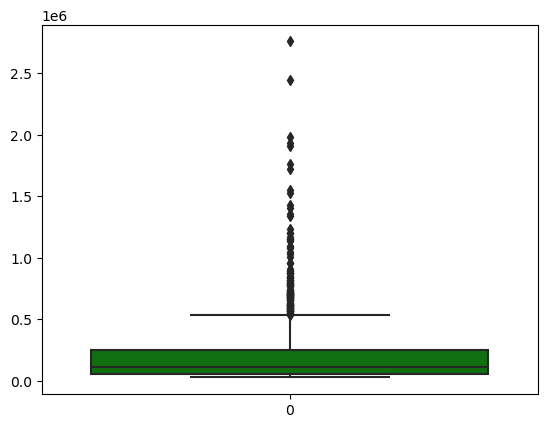

In [22]:
sns.boxplot(gross_movies_df['Votes'],color='green')

<Axes: >

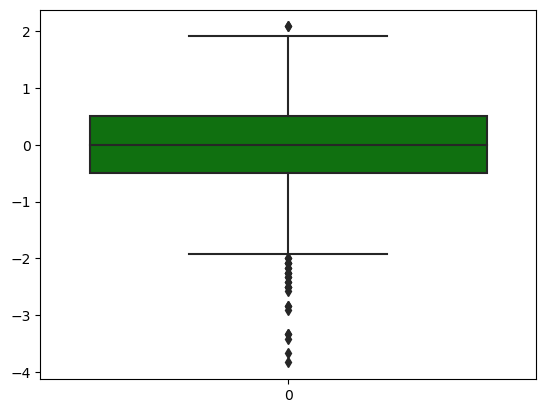

In [23]:
sns.boxplot(gross_movies_df['Ratings'],color='green')

<Axes: >

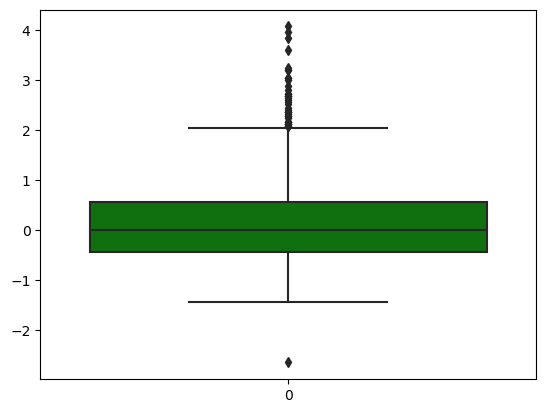

In [24]:
sns.boxplot(gross_movies_df['Duration_min'],color='green')

<Axes: >

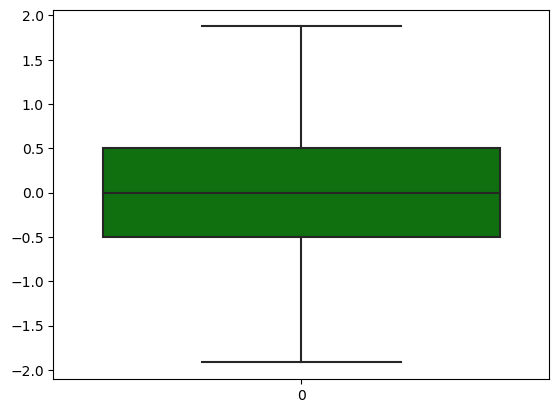

In [25]:
sns.boxplot(gross_movies_df['Metascore'],color='green')

Duration_min, Votes & Ratings have many outliers present.

In [26]:
outlier_columns=['Duration_min','Votes','Ratings']

#Using zscore method for outliers removal
zscore_threshold = 3

# Calculating z-scores
z_scores_duration = stats.zscore(gross_movies_df['Duration_min'])
z_scores_ratings = stats.zscore(gross_movies_df['Ratings'])
z_scores_votes = stats.zscore(gross_movies_df['Votes'])

# Finding index of outliers
outlier_duration = (z_scores_duration > zscore_threshold) | (z_scores_duration < -zscore_threshold)
outlier_ratings = (z_scores_ratings > zscore_threshold) | (z_scores_ratings < -zscore_threshold)
outlier_votes = (z_scores_votes > zscore_threshold) | (z_scores_votes < -zscore_threshold)

# Combining
combined_outlier_indices = outlier_duration | outlier_ratings | outlier_votes

# Remove outliers from the DataFrame
gross_movies_df_no_outliers = gross_movies_df[~combined_outlier_indices]

gross_movies_df_no_outliers.reset_index(drop=True, inplace=True)

In [27]:
gross_movies_df_no_outliers

,Duration_min,Year,Ratings,Metascore,Votes,Gross_collection_millions,Certification,Director1_Michael Bay,Director1_Tony Scott,Director1_Steven Spielberg,...,Genre2_Sci-Fi,Genre2_Horror,Genre2_Mystery,Genre2_Fantasy,Genre2_War,Genre2_Biography,Genre2_Not Available,Genre2_Sport,Genre2_Family,Genre2_History
0,0.24,0.6250,1.583333,1.416667,616626,190.24,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.04,-1.3750,1.583333,1.291667,739140,85.16,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.40,-0.3125,1.583333,1.000000,604124,0.71,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.76,0.8750,1.500000,1.041667,618475,718.73,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.36,-0.8125,1.500000,0.958333,686392,67.44,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,1.88,0.4375,-1.250000,-0.791667,36798,4.83,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1417,0.48,-0.6250,-1.333333,-0.875000,34217,13.98,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1418,1.56,0.6875,-1.500000,-0.958333,31802,2.97,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1419,-0.36,-0.6875,-1.583333,-1.041667,122102,30.88,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After removal of outliers from 'Duration_min', 'Ratings' & 'Votes' columns with z-score method,Data Loss = 3.9%. 

The data loss is very small, hence we will remove those outliers.

In [28]:
gross_movies_df = gross_movies_df_no_outliers

In [29]:
#Differentiating Features and Target columns
x=gross_movies_df.drop(['Gross_collection_millions'],axis=1)
y=gross_movies_df['Gross_collection_millions']

In [30]:
x #features

,Duration_min,Year,Ratings,Metascore,Votes,Certification,Director1_Michael Bay,Director1_Tony Scott,Director1_Steven Spielberg,Director1_Robert Rodriguez,...,Genre2_Sci-Fi,Genre2_Horror,Genre2_Mystery,Genre2_Fantasy,Genre2_War,Genre2_Biography,Genre2_Not Available,Genre2_Sport,Genre2_Family,Genre2_History
0,0.24,0.6250,1.583333,1.416667,616626,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.04,-1.3750,1.583333,1.291667,739140,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.40,-0.3125,1.583333,1.000000,604124,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.76,0.8750,1.500000,1.041667,618475,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.36,-0.8125,1.500000,0.958333,686392,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,1.88,0.4375,-1.250000,-0.791667,36798,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1417,0.48,-0.6250,-1.333333,-0.875000,34217,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1418,1.56,0.6875,-1.500000,-0.958333,31802,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1419,-0.36,-0.6875,-1.583333,-1.041667,122102,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
y #Target variable

0       190.24
1        85.16
2         0.71
3       718.73
4        67.44
         ...  
1416      4.83
1417     13.98
1418      2.97
1419     30.88
1420     28.41
Name: Gross_collection_millions, Length: 1421, dtype: float64

As discussed earlier, we need to address the scaling of Votes in this model. 

In [32]:
x['Votes'].skew()

1.8169660756198727

In [33]:
#Using robustscaler
x['Votes'] = robust.fit_transform(x[['Votes']])

In [34]:
x

,Duration_min,Year,Ratings,Metascore,Votes,Certification,Director1_Michael Bay,Director1_Tony Scott,Director1_Steven Spielberg,Director1_Robert Rodriguez,...,Genre2_Sci-Fi,Genre2_Horror,Genre2_Mystery,Genre2_Fantasy,Genre2_War,Genre2_Biography,Genre2_Not Available,Genre2_Sport,Genre2_Family,Genre2_History
0,0.24,0.6250,1.583333,1.416667,2.828511,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.04,-1.3750,1.583333,1.291667,3.516073,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.40,-0.3125,1.583333,1.000000,2.758348,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.76,0.8750,1.500000,1.041667,2.838887,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.36,-0.8125,1.500000,0.958333,3.220045,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,1.88,0.4375,-1.250000,-0.791667,-0.425550,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1417,0.48,-0.6250,-1.333333,-0.875000,-0.440035,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1418,1.56,0.6875,-1.500000,-0.958333,-0.453588,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1419,-0.36,-0.6875,-1.583333,-1.041667,0.053186,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
x['Votes'].skew()

1.8169660756198738

Following the standardization process applied to the "Votes" feature, the distribution of the "Votes" data remains unchanged compared to its original state.

In [36]:
skewed_columns=['Duration_min','Votes']
subset_x=x[skewed_columns]
subset_x.skew()

Duration_min    0.657446
Votes           1.816966
dtype: float64

Skewness of Duration_min is less than 0.7, therefore we will not reduce its skewness.
Skewness of Votes indicates righward skew in distribution.

In [37]:
subset_x['Votes']=np.cbrt(subset_x['Votes'])

In [38]:
subset_x.skew()

Duration_min    0.657446
Votes           0.218860
dtype: float64

Skewness of Votes distribution decreases if we apply cuberoot tranformation method.

In [39]:
x['Votes']=np.cbrt(x['Votes'])
x['Votes'].skew()

0.21886016917606774

In [40]:
#Checking Correlationship between features
columns_of_interest = ['Duration_min', 'Year', 'Ratings', 'Metascore', 'Votes']

subset_x = x[columns_of_interest]

subset_x.corr()

,Duration_min,Year,Ratings,Metascore,Votes
Duration_min,1.000000,0.122495,0.359571,0.296379,0.322996
Year,0.122495,1.000000,-0.082326,-0.090126,0.220013
Ratings,0.359571,-0.082326,1.000000,0.753862,0.422363
Metascore,0.296379,-0.090126,0.753862,1.000000,0.306329
Votes,0.322996,0.220013,0.422363,0.306329,1.000000


<Axes: >

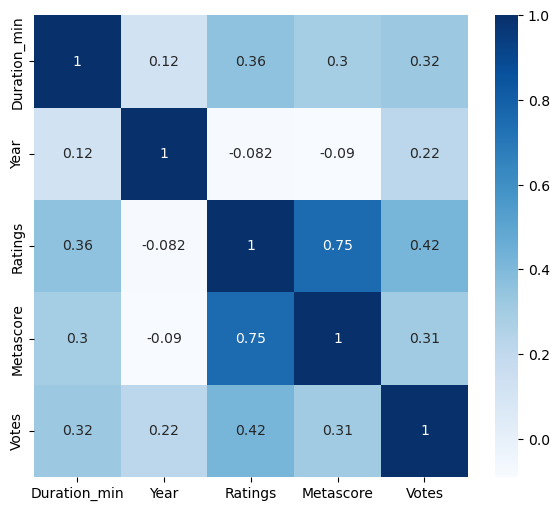

In [41]:
plt.figure(figsize=(7,6))
sns.heatmap(subset_x.corr(),annot=True,cmap='Blues')

Important observations:

* Ratings and Metascore  have a strong positive correlation of 0.75. This indicates that movies with higher Metascores given by critics also tend to have higher ratings from audience. As expected well-received movies are likely to be appreciated by both audience and critics.
  * Given the nature of "Ratings" and "Metascore," their correlation is expected.
  * If we remove one of them, it might not significantly impact the information captured by the other.
  * "Ratings" are user-generated ratings from IMDb platform, while "Metascore" is a weighted average of critic reviews.
  * If need arises to remove one of them (to address multicollinearity issue), we will prioritize "Ratings" as it is a direct reflection of user opinions.

* Duration and Ratings: There is a samll positive corelation between "Duration_min" and "Ratings" (0.36). This shows that movies with longer durations may receive higher ratings.

* Votes and Ratings: "Votes" and "Ratings" show a positive correlation of around 0.42. This shows that movies with higher ratigns tend to attract more votes due to increased audience engagement for popular movies.

In [42]:
#Checking multicollinearity using the Variance Inflation Factor (VIF)
feature = x.columns.tolist()

vif_data = pd.DataFrame()
vif_data["Features"] = feature
vif_data["VIF"] = [variance_inflation_factor(x[feature].values, i) for i in range(len(feature))]

#using pandas function to show full dataframe
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
vif_data

,Features,VIF
0,Duration_min,1.680619
1,Year,1.481044
2,Ratings,3.451636
3,Metascore,2.738734
4,Votes,1.890520
5,Certification,1.587554
6,Director1_Michael Bay,1.160790
7,Director1_Tony Scott,1.184065
8,Director1_Steven Spielberg,1.116379
9,Director1_Robert Rodriguez,1.039131


In [43]:
#Genre2_Animation & Genre2_History are empty columns, hence removing them.
x=x.drop(['Genre2_Animation','Genre2_History'],axis=1)

In [44]:
#Re-checking multicollinearity using the Variance Inflation Factor (VIF)
feature = x.columns.tolist()

vif_data = pd.DataFrame()
vif_data["Features"] = feature
vif_data["VIF"] = [variance_inflation_factor(x[feature].values, i) for i in range(len(feature))]

vif_data

,Features,VIF
0,Duration_min,1.680619
1,Year,1.481044
2,Ratings,3.451636
3,Metascore,2.738734
4,Votes,1.890520
5,Certification,1.587554
6,Director1_Michael Bay,1.160790
7,Director1_Tony Scott,1.184065
8,Director1_Steven Spielberg,1.116379
9,Director1_Robert Rodriguez,1.039131


In [45]:
#reseting pandas function to show compressed dataframe
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

Modeling

We will determine the best performing model from the following:
 
1. Linear Regression
2. Random Forest Regressor
3. Adaboost Regressor
4. Gradient Boosting Regressor
5. Decsision Tree Regressor
6. KNN Regressor
7. Lasso Regressor
8. Ridge Regressor
9. Support Vector Regressor (SVR).

Model performance indicator metrics:

1. R2 Score (Test and Training): The R2 score indicates the proportion of the variance.Models with higher R2 scores are fiting the data better.

2. Mean Absolute Error (MAE): MAE is the average absloute difference between predicted and actual values (residuals). Lower values better the performance.

3. Mean Squared Error (MSE): MSE calculates the average of squarde differences b/w predicted and actual values. Like MAE, lower MSE values better  the performance.

4. Root Mean Squared Error (RMSE): RMSE is the square root of the MSE. It is easier to understand because it is in the same unit as the target variable.

5. Cross Validation Score and Mean: Cross-validation helps assess the model's performance on unseen data. Higher cross-validation scores generally indicate better generalization and less overfitting.

In [46]:
#Splitting dataset into training testing dataset, selecting testing dataset 20% of whole dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20) 

#definging a function

def model(m):
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    
    
    print('R2 Score: ',r2_score(y_test,pred))  #test r2_score of the model
    print('R2 Score on training data: ',r2_score(y_train,m.predict(x_train))) #train r2_score of the model
    
    print('MAE: ',mean_absolute_error(y_test,pred)) #MAE of model
    print('MSE: ',mean_squared_error(y_test,pred)) #MSE of model
    print('RMSE: ',np.sqrt(mean_squared_error(y_test,pred))) #RMSE of model
    
    cscore=cross_val_score(m,x,y)  #To check overfitting
    print('Mean of Cross_validation_scorec: ',cscore.mean())
    print('Cross_validation_score: ',cscore)
    
    sns.regplot(x=pred,y=y_test) #Graphing representation of comparison of test values & predicited values

R2 Score:  0.48570367563307804
R2 Score on training data:  0.5349759674022666
MAE:  40.183168859649115
MSE:  3978.8983543194904
RMSE:  63.07850944909439
Mean of Cross_validation_scorec:  -2.3435242551966964e+22
Cross_validation_score:  [ 3.62976070e-01  3.67000350e-01 -1.81177307e+21 -1.15364440e+23
 -1.84076207e-02]


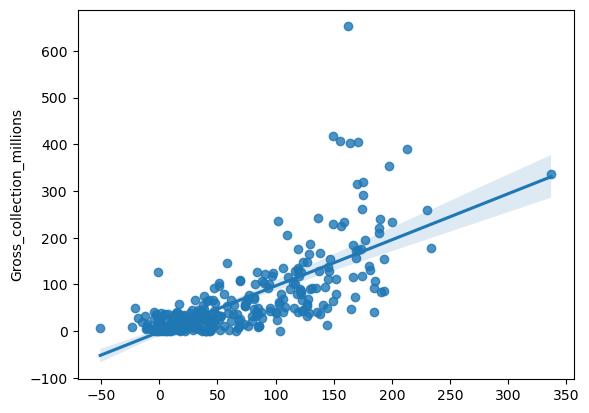

In [47]:
lr=LinearRegression()
model(lr)

R2 Score:  0.5788613327572218
R2 Score on training data:  0.9526480457600008
MAE:  31.960258245614042
MSE:  3258.176017678666
RMSE:  57.080434631129656
Mean of Cross_validation_scorec:  0.5553173444735277
Cross_validation_score:  [0.4382233  0.63833672 0.66429868 0.6079931  0.42773492]


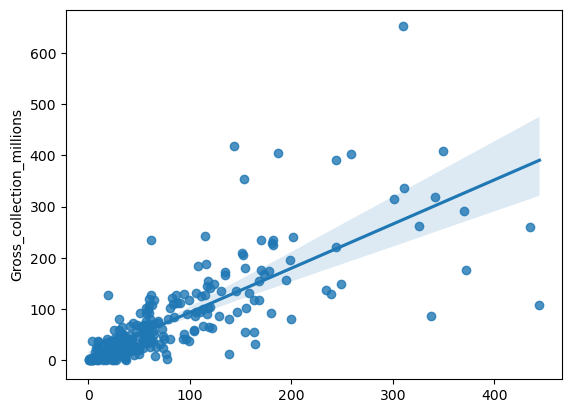

In [48]:
rfr=RandomForestRegressor()
model(rfr)

R2 Score:  0.34971990991425694
R2 Score on training data:  0.6358273638425709
MAE:  53.61217068903043
MSE:  5030.948614058007
RMSE:  70.92918027200093
Mean of Cross_validation_scorec:  0.23241884658322257
Cross_validation_score:  [ 0.34779572  0.48426141  0.43417336  0.22924156 -0.33337781]


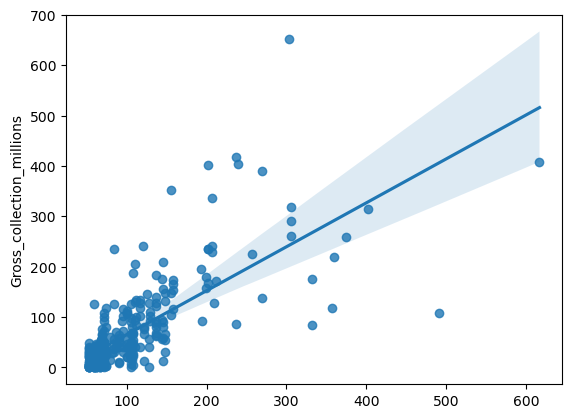

In [49]:
adr=AdaBoostRegressor()
model(adr)

R2 Score:  0.5852533011424976
R2 Score on training data:  0.8702099206309766
MAE:  30.803641384594098
MSE:  3208.723996958233
RMSE:  56.64559997880006
Mean of Cross_validation_scorec:  0.5374705267725417
Cross_validation_score:  [0.41092717 0.62311688 0.67650696 0.60062456 0.37617705]


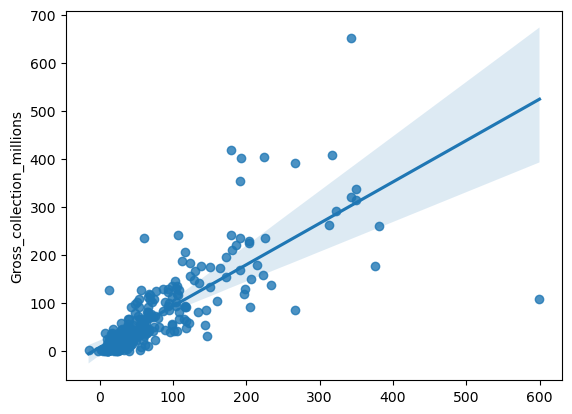

In [50]:
gbr=GradientBoostingRegressor()
model(gbr)

R2 Score:  0.1549514139688989
R2 Score on training data:  1.0
MAE:  45.396631578947364
MSE:  6537.792064561404
RMSE:  80.85661422890155
Mean of Cross_validation_scorec:  0.18722010384185506
Cross_validation_score:  [-0.0051539   0.37363698  0.43173432  0.22889995 -0.09301684]


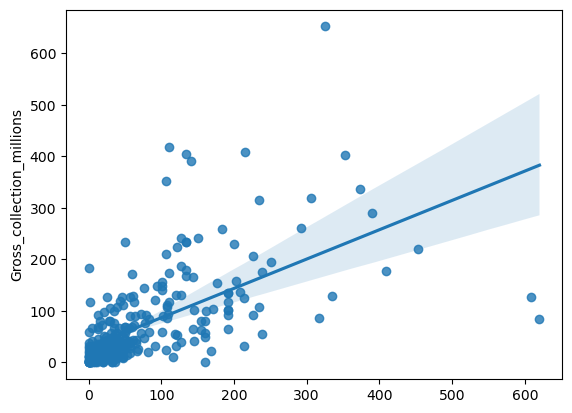

In [51]:
dtr=DecisionTreeRegressor()
model(dtr)

R2 Score:  0.4316698556706702
R2 Score on training data:  0.672064514493304
MAE:  36.97145263157895
MSE:  4396.9357136
RMSE:  66.30939385637603
Mean of Cross_validation_scorec:  0.416844068140718
Cross_validation_score:  [0.38563201 0.50832189 0.47025921 0.37391666 0.34609057]


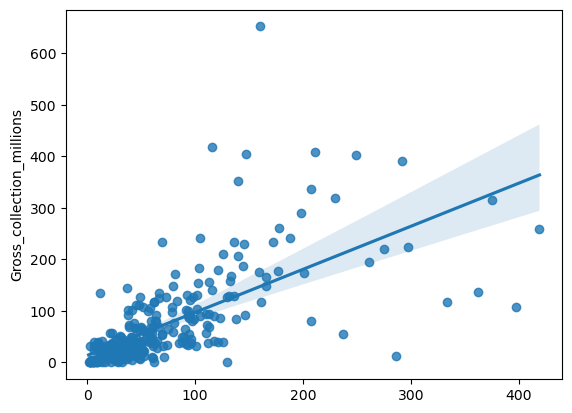

In [52]:
model(KNN())

R2 Score:  0.4779062533500603
R2 Score on training data:  0.4231875883269993
MAE:  40.798600880952065
MSE:  4039.223791659576
RMSE:  63.55488802334228
Mean of Cross_validation_scorec:  0.32665462093197994
Cross_validation_score:  [0.30113083 0.4338995  0.48890232 0.30136209 0.10797836]


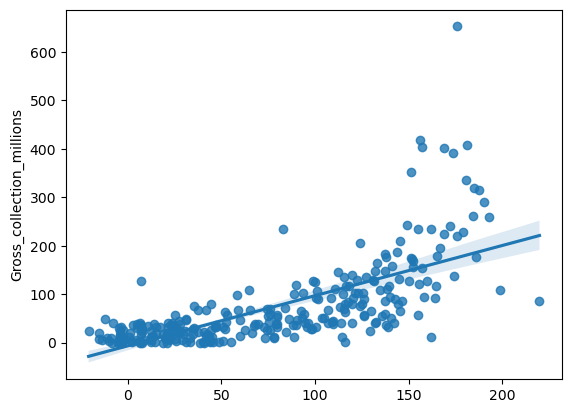

In [53]:
model(Lasso())

R2 Score:  0.500872579584873
R2 Score on training data:  0.5314433443542911
MAE:  39.60508225944391
MSE:  3861.542806338621
RMSE:  62.14131320095047
Mean of Cross_validation_scorec:  0.30330737776115024
Cross_validation_score:  [0.35908415 0.41467632 0.52377666 0.20439109 0.01460868]


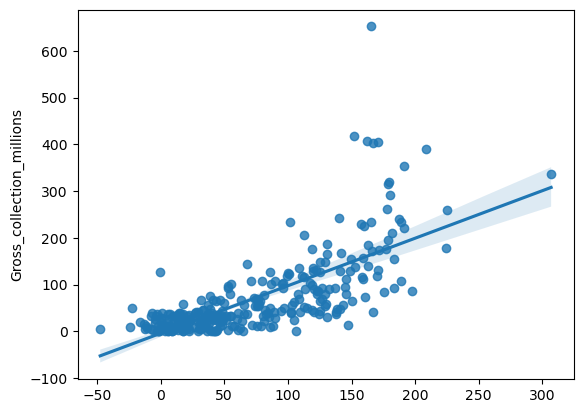

In [54]:
model(Ridge())

R2 Score:  0.24294511328578206
R2 Score on training data:  0.19549313362686627
MAE:  41.57992269479751
MSE:  5857.02113773549
RMSE:  76.5311775535663
Mean of Cross_validation_scorec:  0.18977137151284312
Cross_validation_score:  [0.00801198 0.16069452 0.20323154 0.29949259 0.27742622]


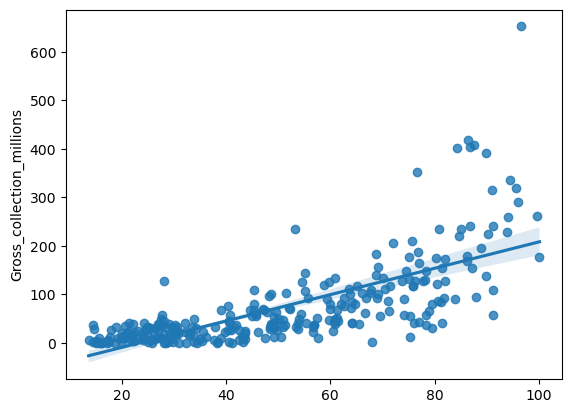

In [55]:
model(SVR())

Model performance results:

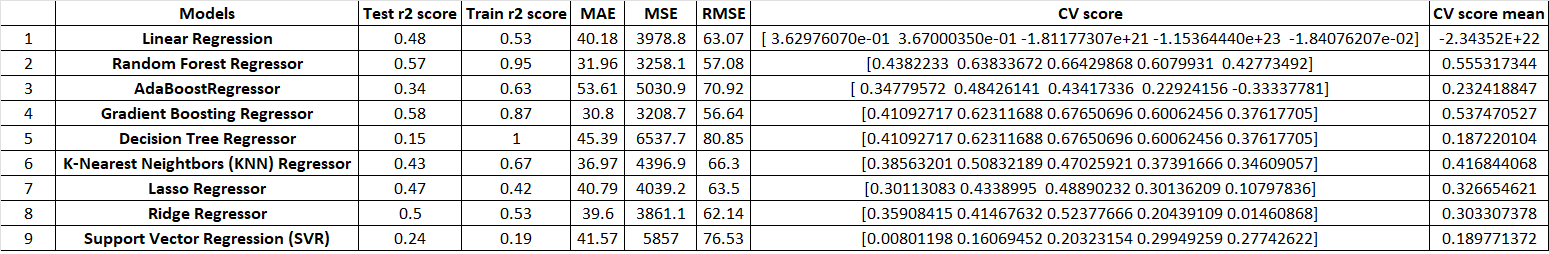

By observing the performance metrics of the models, we can assess that:
1. Random Forest Regressor & Gradient Boosting Regressor are the best performing models from the lot.Their test R2 score are high and lower MAE and MSE. CV score are showing better generalization.
2. KNN Regressor is also performing well. But it is not able generalize well.
3. Linear Regression & Ridge Regressor are almost performing equally but the Ridge is perfoming better on generalizing (higher CV Score)
4. Rest of the models are performing very poorly on our data.


We will evaluate the performance of both the Random Forest Regressor and the Gradient Boosting Regressor after applying hyperparameter tuning to each model. We will compare the outcomes and select the best model eventhough they may be overfitting slightly.

Hyperparameter Tuning

1. Random Forest Regressor

In [56]:
parameters_rfr = {'max_depth':[5,10],
                  'min_samples_leaf':[5,10],
                  'min_samples_split':[5,10],
                  'max_features': ['sqrt','log2',None],
                  'n_estimators': [10, 20,50],
                  'criterion': ['friedman_mse', 'absolute_error','poisson'],
                  'max_leaf_nodes':[10,50,100],
                  'min_impurity_decrease':[0.0,0.2],
                  'bootstrap': [True, False],
                  'oob_score': [True, False],
                  'ccp_alpha':[0.01,0.5],
                  'warm_start': [True, False],
                  'random_state': [10, 20],
                 }

In [57]:
gsv = GridSearchCV(RandomForestRegressor(),parameters_rfr, n_jobs=-1)
gsv.fit(x_train, y_train)
print(gsv.best_params_)

{'bootstrap': True, 'ccp_alpha': 0.01, 'criterion': 'poisson', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 100, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50, 'oob_score': True, 'random_state': 20, 'warm_start': True}


In [59]:
Hyper_rfr=RandomForestRegressor(bootstrap=True,ccp_alpha=0.01,criterion='poisson',max_depth=10,max_features=None,max_leaf_nodes=100,min_impurity_decrease=0.0,min_samples_leaf=5,min_samples_split=5,n_estimators=50,oob_score=True,random_state=20,warm_start=True)

R2 Score:  0.5771377504023096
R2 Score on training data:  0.8210451096253638
MAE:  32.61053877016723
MSE:  3271.5106628444396
RMSE:  57.19712110626233
Mean of Cross_validation_scorec:  0.5677575691883853
Cross_validation_score:  [0.46290727 0.62805856 0.67474309 0.62426406 0.44881486]


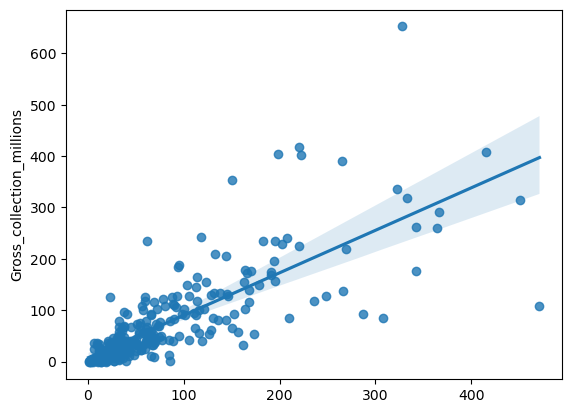

In [60]:
model(Hyper_rfr)

2. Gradient Boosting Regressor

In [61]:
parameters_gbr = {
    'n_estimators': [10, 20,50],
    'criterion': ['friedman_mse', 'absolute_error'],
    'max_features': ['auto','sqrt','log2'],
    'loss':['ls','lad','huber'],
    'subsample':[1,0.1,0.5],
    'learning_rate':[0.01,0.1],
    'max_depth':[3,6],
    'min_samples_split':[10,50],
    'min_samples_leaf':[5,10,20],
    'min_impurity_decrease':[0.0,0.2],
    'random_state': [10, 20],
    'warm_start': [True, False],
    'ccp_alpha':[0.01,0.5]
}

In [62]:
gsv = GridSearchCV(GradientBoostingRegressor(),parameters_gbr,n_jobs=-1)
gsv.fit(x_train, y_train)
print(gsv.best_params_)

{'ccp_alpha': 0.01, 'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 6, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50, 'random_state': 20, 'subsample': 0.5, 'warm_start': True}


In [63]:
Hyper_gbr = GradientBoostingRegressor(ccp_alpha=0.01,criterion='friedman_mse',subsample=0.5,min_impurity_decrease=0.0, n_estimators=50, min_samples_split=10, min_samples_leaf=5, max_features='auto', max_depth=6, loss='huber', learning_rate=0.1,random_state=20,warm_start=True)

R2 Score:  0.659622665566638
R2 Score on training data:  0.8040312037390898
MAE:  29.177564031376185
MSE:  2633.358924918782
RMSE:  51.31626374667959
Mean of Cross_validation_scorec:  0.5893994142703285
Cross_validation_score:  [0.53100515 0.6524021  0.69781997 0.56296674 0.50280311]


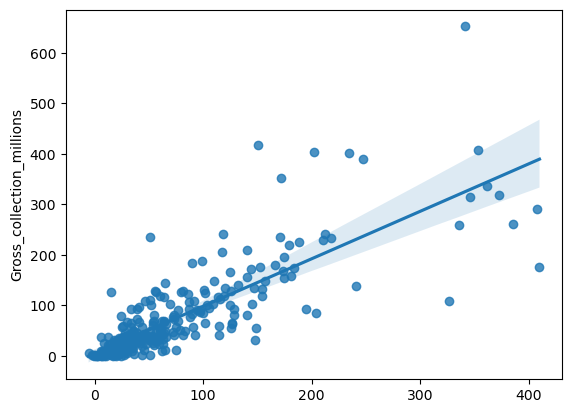

In [64]:
model(Hyper_gbr)

GradientBoostingRegressor is our best performing model at R2_score 65.96

In [65]:
#Saving our model
import joblib
joblib.dump(Hyper_gbr,'Imdb Movie Gross Collection Prediction model.pkl')

['Imdb Movie Gross Collection Prediction model.pkl']

In [66]:
model=joblib.load('Imdb Movie Gross Collection Prediction model.pkl')
Prediction=model.predict(x_test)
Prediction

array([  8.03506898,  51.55984596,  54.28406963,  28.10023889,
         5.94322974, 124.41372796,  53.30079025,  12.67255861,
        31.89680364,  64.33090117, 101.82256522,  87.29919883,
       353.05232255, 144.36650138, 148.41799582,  83.20657533,
        34.87487609,  36.01049276,  81.76879052,  33.87373755,
        62.2450595 ,   3.21595504,  89.64344973,  45.88984011,
        75.42021767,  13.01062793,  17.47121676,  63.06697441,
        38.29729683, 210.47063131,  32.13874537,  34.90530671,
        38.97623956,  18.29515354,  31.21206387,  74.73972067,
        13.39391492,  10.05539003, 194.66362365,  19.44240047,
        30.3796869 ,  28.70687615,  26.18372255,  71.99903043,
        13.346133  ,  56.48946543,  43.99444157,  17.77229524,
        30.0994679 ,  28.25480889,  15.63620721, 154.16129152,
        26.97973199, 128.36090798, 150.62871175,  33.79148482,
        34.02901422,  73.27871252,  24.40072193,  49.43315433,
        20.22841492,  23.41555503,  65.33859834,  64.47

In [67]:
Comparison=pd.DataFrame()
Comparison['True Value']=y_test
Comparison['Prediciton']=Prediction
Comparison

,True Value,Prediciton
1375,2.10,8.035069
63,111.11,51.559846
476,66.76,54.284070
272,33.20,28.100239
1397,4.63,5.943230
...,...,...
379,11.26,20.044069
290,0.13,-0.716864
1153,31.85,37.384561
747,1.11,5.268098


# Model  - Votes Prediction Model

In [68]:
votes_movies_df=encoded_df
votes_movies_df

,Duration_min,Year,Ratings,Metascore,Votes,Gross_collection_millions,Certification,Director1_Michael Bay,Director1_Tony Scott,Director1_Steven Spielberg,...,Genre2_Sci-Fi,Genre2_Horror,Genre2_Mystery,Genre2_Fantasy,Genre2_War,Genre2_Biography,Genre2_Not Available,Genre2_Sport,Genre2_Family,Genre2_History
0,1.64,0.0000,2.083333,1.291667,2756999,534.86,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.60,-0.3125,2.083333,1.708333,1905424,377.85,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.48,0.1250,1.916667,0.875000,2447577,292.58,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.68,-0.4375,1.916667,1.625000,1933646,315.54,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.72,-0.3750,1.916667,1.416667,1719437,342.55,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,0.48,-0.6250,-1.333333,-0.875000,34217,13.98,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1475,1.56,0.6875,-1.500000,-0.958333,31802,2.97,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1476,-0.36,-0.6875,-1.583333,-1.041667,122102,30.88,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1477,-0.96,-1.0000,-1.750000,-1.125000,43755,28.41,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
#Checking the shape 
votes_movies_df.shape

(1479, 104)

Checking for outliers

<Axes: >

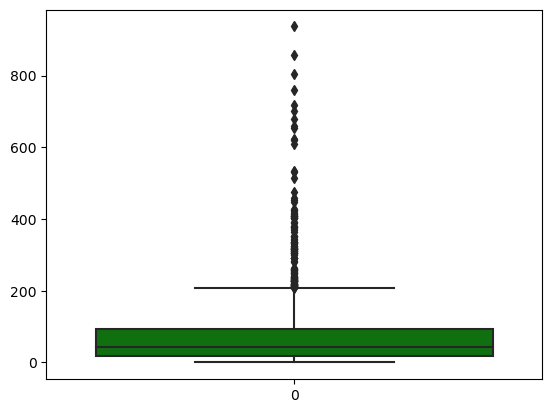

In [70]:
sns.boxplot(votes_movies_df['Gross_collection_millions'],color='green')

<Axes: >

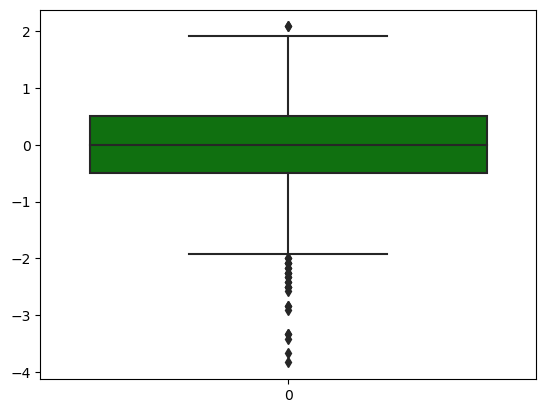

In [71]:
sns.boxplot(votes_movies_df['Ratings'],color='green')

<Axes: >

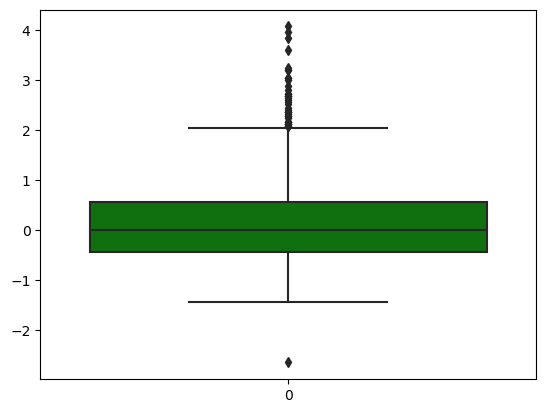

In [72]:
sns.boxplot(votes_movies_df['Duration_min'],color='green')

<Axes: >

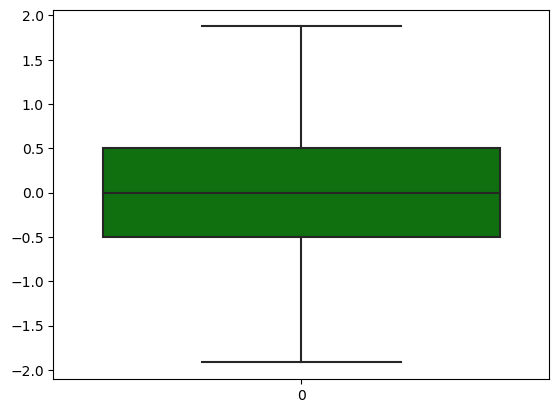

In [73]:
sns.boxplot(votes_movies_df['Metascore'],color='green')

Outliers found in Duraion_min,Gross_collection_millions &ratings columns.

In [74]:
outlier_columns=['Duration_min','Gross_collection_millions','Ratings']

#using zscore method
zscore_threshold = 3

# Calculating z-scores
z_scores_duration = stats.zscore(votes_movies_df['Duration_min'])
z_scores_ratings = stats.zscore(votes_movies_df['Ratings'])
z_scores_gross = stats.zscore(votes_movies_df['Gross_collection_millions'])

# Finding index of outliers
outlier_duration = (z_scores_duration > zscore_threshold) | (z_scores_duration < -zscore_threshold)
outlier_ratings = (z_scores_ratings > zscore_threshold) | (z_scores_ratings < -zscore_threshold)
outlier_gross = (z_scores_gross > zscore_threshold) | (z_scores_gross < -zscore_threshold)

# Combining
combined_outlier_indices = outlier_duration | outlier_ratings | outlier_gross

# Remove outliers from the DataFrame
votes_movies_df_no_outliers = votes_movies_df[~combined_outlier_indices]

votes_movies_df_no_outliers.reset_index(drop=True, inplace=True)

In [75]:
votes_movies_df_no_outliers

,Duration_min,Year,Ratings,Metascore,Votes,Gross_collection_millions,Certification,Director1_Michael Bay,Director1_Tony Scott,Director1_Steven Spielberg,...,Genre2_Sci-Fi,Genre2_Horror,Genre2_Mystery,Genre2_Fantasy,Genre2_War,Genre2_Biography,Genre2_Not Available,Genre2_Sport,Genre2_Family,Genre2_History
0,1.48,0.1250,1.916667,0.875000,2447577,292.58,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.00,-0.5625,1.833333,0.833333,1977968,171.48,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.52,-1.7500,1.833333,1.208333,1334139,290.48,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.04,-1.0625,1.750000,0.916667,1134882,204.84,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.40,-1.9375,1.750000,1.541667,1406155,322.74,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,1.88,0.4375,-1.250000,-0.791667,36798,4.83,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1408,0.48,-0.6250,-1.333333,-0.875000,34217,13.98,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1409,1.56,0.6875,-1.500000,-0.958333,31802,2.97,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1410,-0.36,-0.6875,-1.583333,-1.041667,122102,30.88,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After removal of outliers from 'Duration_min', 'Ratings' & 'Gross_collection_millions' columns with z-score method,Data Loss = 4.53%. Therefore we are using z-score method for outliers removal.

In [76]:
votes_movies_df=votes_movies_df_no_outliers

In [77]:
#differentiating features & target variables
x=votes_movies_df.drop(['Votes'],axis=1)
y=votes_movies_df['Votes']

In [78]:
x #features

,Duration_min,Year,Ratings,Metascore,Gross_collection_millions,Certification,Director1_Michael Bay,Director1_Tony Scott,Director1_Steven Spielberg,Director1_Robert Rodriguez,...,Genre2_Sci-Fi,Genre2_Horror,Genre2_Mystery,Genre2_Fantasy,Genre2_War,Genre2_Biography,Genre2_Not Available,Genre2_Sport,Genre2_Family,Genre2_History
0,1.48,0.1250,1.916667,0.875000,292.58,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.00,-0.5625,1.833333,0.833333,171.48,3.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.52,-1.7500,1.833333,1.208333,290.48,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.04,-1.0625,1.750000,0.916667,204.84,3.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.40,-1.9375,1.750000,1.541667,322.74,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,1.88,0.4375,-1.250000,-0.791667,4.83,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1408,0.48,-0.6250,-1.333333,-0.875000,13.98,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1409,1.56,0.6875,-1.500000,-0.958333,2.97,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1410,-0.36,-0.6875,-1.583333,-1.041667,30.88,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
y #target variable

0       2447577
1       1977968
2       1334139
3       1134882
4       1406155
         ...   
1407      36798
1408      34217
1409      31802
1410     122102
1411      43755
Name: Votes, Length: 1412, dtype: int64

In [80]:
x['Gross_collection_millions'].skew()

1.8082623058397296

In [81]:
x['Gross_collection_millions']=robust.fit_transform(x[['Gross_collection_millions']])

In [82]:
x

,Duration_min,Year,Ratings,Metascore,Gross_collection_millions,Certification,Director1_Michael Bay,Director1_Tony Scott,Director1_Steven Spielberg,Director1_Robert Rodriguez,...,Genre2_Sci-Fi,Genre2_Horror,Genre2_Mystery,Genre2_Fantasy,Genre2_War,Genre2_Biography,Genre2_Not Available,Genre2_Sport,Genre2_Family,Genre2_History
0,1.48,0.1250,1.916667,0.875000,3.576713,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.00,-0.5625,1.833333,0.833333,1.848750,3.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.52,-1.7500,1.833333,1.208333,3.546748,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.04,-1.0625,1.750000,0.916667,2.324760,3.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.40,-1.9375,1.750000,1.541667,4.007063,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,1.88,0.4375,-1.250000,-0.791667,-0.529162,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1408,0.48,-0.6250,-1.333333,-0.875000,-0.398602,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1409,1.56,0.6875,-1.500000,-0.958333,-0.555702,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1410,-0.36,-0.6875,-1.583333,-1.041667,-0.157457,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
x['Gross_collection_millions'].skew()

1.8082623058397294

Following the standardization process applied to the Gross_collection_millions feature, the distribution of the Gross_collection_millions data remains unchanged compared to its original state.

In [84]:
skewed_columns=['Duration_min','Gross_collection_millions','Ratings']
subset_x=x[skewed_columns]
subset_x.skew()

Duration_min                 0.675830
Gross_collection_millions    1.808262
Ratings                     -0.204610
dtype: float64

Skewness of Gross_collection_millions indicates righward skew in distribution.

In [85]:
#reducing skewness using cuberoot tansformation
subset_x['Gross_collection_millions']=np.cbrt(subset_x['Gross_collection_millions'])

In [86]:
subset_x.skew()

Duration_min                 0.67583
Gross_collection_millions    0.20270
Ratings                     -0.20461
dtype: float64

Skewness of Gross_collection_millions distribution decreases if we apply cuberoot tranformation method.

In [88]:
x['Gross_collection_millions']=np.cbrt(x['Gross_collection_millions'])
x['Gross_collection_millions'].skew()

0.2026998100974035

In [89]:
#Checking Correlationship between features
columns_of_interest = ['Duration_min', 'Year', 'Ratings', 'Metascore', 'Gross_collection_millions']
subset_x = x[columns_of_interest]
subset_x.corr()

,Duration_min,Year,Ratings,Metascore,Gross_collection_millions
Duration_min,1.000000,0.099098,0.360064,0.290994,0.263079
Year,0.099098,1.000000,-0.110061,-0.114750,0.077571
Ratings,0.360064,-0.110061,1.000000,0.753961,0.183538
Metascore,0.290994,-0.114750,0.753961,1.000000,0.166526
Gross_collection_millions,0.263079,0.077571,0.183538,0.166526,1.000000


<Axes: >

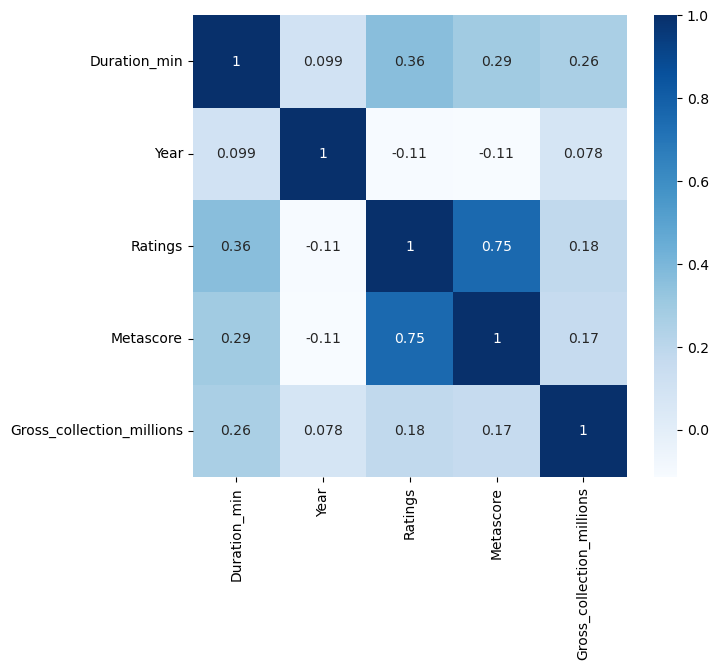

In [90]:
plt.figure(figsize=(7,6))
sns.heatmap(subset_x.corr(),annot=True,cmap='Blues')

Important observations:

* Ratings and Metascore  have a strong positive correlation of 0.75. This indicates that movies with higher Metascores given by critics also tend to have higher ratings from audience. As expected well-received movies are likely to be appreciated by both audience and critics.
  * Given the nature of "Ratings" and "Metascore," their correlation is expected.
  * If we remove one of them, it might not significantly impact the information captured by the other.
  * "Ratings" are user-generated ratings from IMDb platform, while "Metascore" is a weighted average of critic reviews.
  * If need arises to remove one of them (to address multicollinearity issue), we will prioritize "Ratings" as it is a direct reflection of user opinions.

* Duration and Ratings: There is a samll positive corelation between "Duration_min" and "Ratings" (0.36). This shows that movies with longer durations may receive higher ratings.

In [91]:
#Checking multicollinearity using the Variance Inflation Factor (VIF)
feature = x.columns.tolist()

vif_data = pd.DataFrame()
vif_data["Features"] = feature
vif_data["VIF"] = [variance_inflation_factor(x[feature].values, i) for i in range(len(feature))]

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
vif_data

,Features,VIF
0,Duration_min,1.683438
1,Year,1.388701
2,Ratings,3.057220
3,Metascore,2.737452
4,Gross_collection_millions,1.554984
5,Certification,1.645622
6,Director1_Michael Bay,1.162169
7,Director1_Tony Scott,1.186225
8,Director1_Steven Spielberg,1.149735
9,Director1_Robert Rodriguez,1.037159


In [92]:
#removing empty columns
x=x.drop(['Genre2_Animation','Genre2_History'],axis=1)

In [93]:
feature = x.columns.tolist()

vif_data = pd.DataFrame()
vif_data["Features"] = feature
vif_data["VIF"] = [variance_inflation_factor(x[feature].values, i) for i in range(len(feature))]

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
vif_data

,Features,VIF
0,Duration_min,1.683438
1,Year,1.388701
2,Ratings,3.057220
3,Metascore,2.737452
4,Gross_collection_millions,1.554984
5,Certification,1.645622
6,Director1_Michael Bay,1.162169
7,Director1_Tony Scott,1.186225
8,Director1_Steven Spielberg,1.149735
9,Director1_Robert Rodriguez,1.037159


In [94]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

Just like in the model for predicting Gross Collection, we will utilize the same set of models and performance metrics for our Votes prediction model.

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
#definging a function

def model(m):
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    
    
    print('R2 Score: ',r2_score(y_test,pred)*100)  #test r2_score
    print('R2 Score on training data: ',r2_score(y_train,m.predict(x_train))*100) #training r2_Score
    
    print('MAE: ',mean_absolute_error(y_test,pred)) #MAE
    print('MSE: ',mean_squared_error(y_test,pred)) #MSE
    print('RMSE: ',np.sqrt(mean_squared_error(y_test,pred))) #RSME
    
    cscore=cross_val_score(m,x,y) #for overfitting check
    print('Mean of Cross_validation_scorec: ',cscore.mean())
    print('Cross_validation_score: ',cscore)
    
    sns.regplot(x=pred,y=y_test)

R2 Score:  -1.066061168397689e+24
R2 Score on training data:  59.21791452794245
MAE:  1066157759375861.4
MSE:  3.2168394005561133e+32
RMSE:  1.79355496167698e+16
Mean of Cross_validation_scorec:  -3.0200299310267815e+23
Cross_validation_score:  [ 1.16112832e-01  4.72202286e-01 -3.49241046e+23 -1.16077392e+24
 -1.29304890e+01]


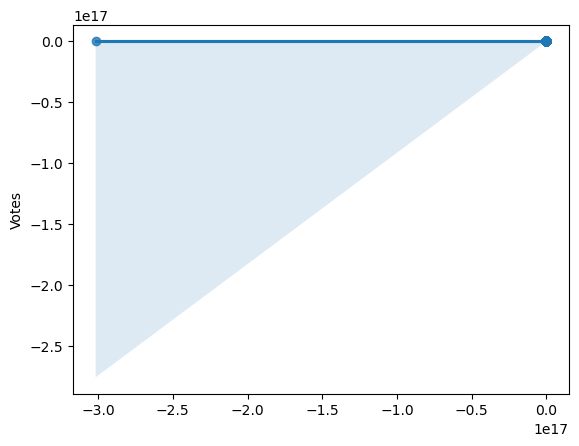

In [96]:
lr=LinearRegression()
model(lr)

R2 Score:  75.35901172230152
R2 Score on training data:  96.31965981936051
MAE:  57679.34342756184
MSE:  7435417808.105732
RMSE:  86228.86876276258
Mean of Cross_validation_scorec:  0.3248712725102561
Cross_validation_score:  [ 0.26122439  0.65425596  0.54343617  0.62266663 -0.45722679]


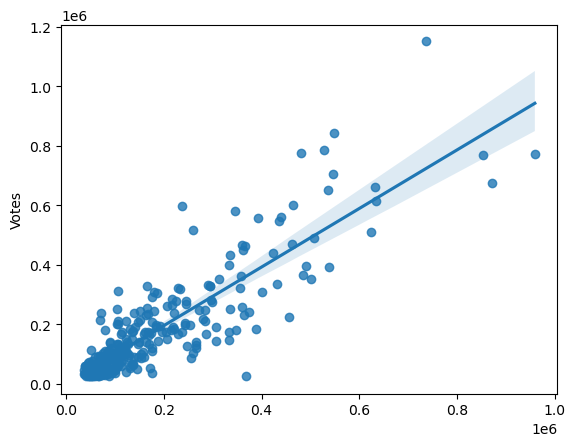

In [97]:
rfr=RandomForestRegressor()
model(rfr)

R2 Score:  37.780117593095696
R2 Score on training data:  66.11795608617814
MAE:  117201.85289169828
MSE:  18774848494.418888
RMSE:  137021.34320761453
Mean of Cross_validation_scorec:  -1.0046749004061202
Cross_validation_score:  [ 0.28401489  0.49259359 -0.17945495 -1.21976037 -4.40076766]


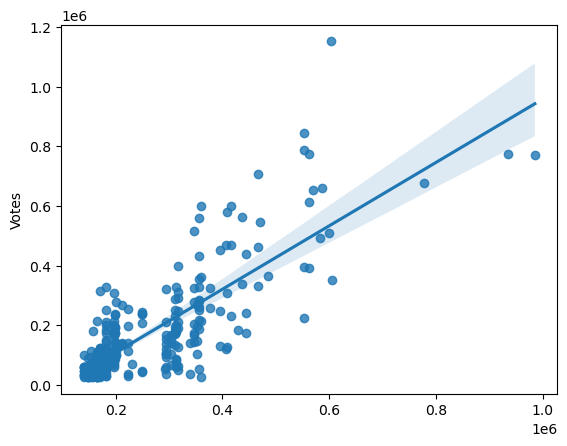

In [98]:
adr=AdaBoostRegressor()
model(adr)

R2 Score:  78.51818571835713
R2 Score on training data:  91.69894250767412
MAE:  53355.1629184967
MSE:  6482137106.680453
RMSE:  80511.72030630356
Mean of Cross_validation_scorec:  0.3910786406698229
Cross_validation_score:  [ 0.25723763  0.58095449  0.60231738  0.64859373 -0.13371003]


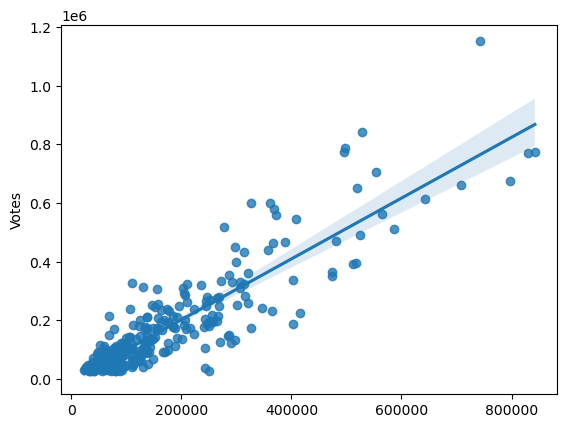

In [99]:
gbr=GradientBoostingRegressor()
model(gbr)

R2 Score:  45.48231792120633
R2 Score on training data:  100.0
MAE:  84381.52650176678
MSE:  16450709671.908127
RMSE:  128260.31994310682
Mean of Cross_validation_scorec:  -0.08318330522738251
Cross_validation_score:  [ 0.2065583   0.51183049  0.03326881  0.0948749  -1.26244903]


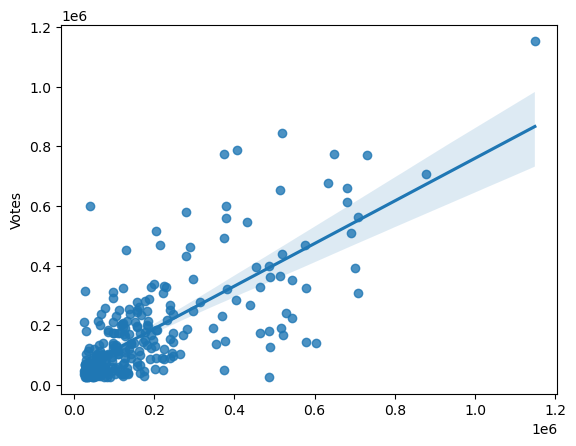

In [100]:
dtr=DecisionTreeRegressor()
model(dtr)

R2 Score:  61.40380173023089
R2 Score on training data:  73.93194517189535
MAE:  67870.42473498233
MSE:  11646402194.020494
RMSE:  107918.49792329624
Mean of Cross_validation_scorec:  0.2571805282155495
Cross_validation_score:  [-0.04601295  0.47224846  0.43696658  0.36600761  0.05669295]


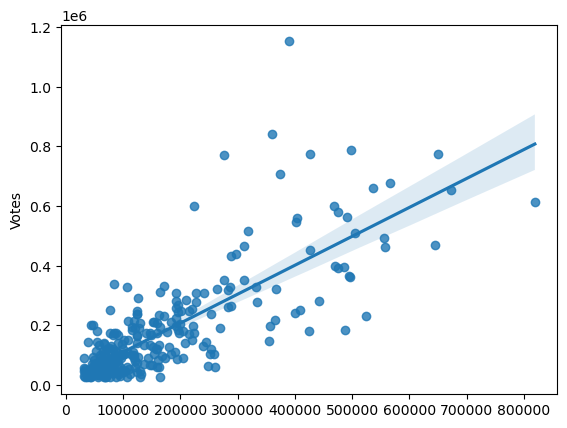

In [101]:
model(KNN())

R2 Score:  52.22553815180453
R2 Score on training data:  59.21774333753884
MAE:  89214.58895093479
MSE:  14415943078.071987
RMSE:  120066.41111514905
Mean of Cross_validation_scorec:  -2.5081829640405617
Cross_validation_score:  [  0.11592589   0.47257772  -0.03174408  -0.1439144  -12.95375995]


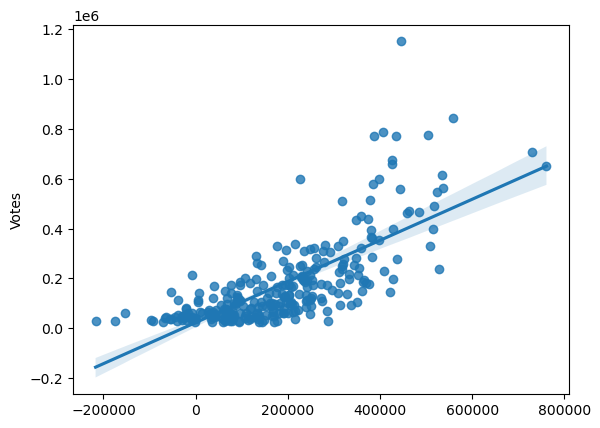

In [102]:
model(Lasso())

R2 Score:  53.878086652068305
R2 Score on training data:  59.062809327651
MAE:  87704.92229918583
MSE:  13917286595.257927
RMSE:  117971.54994005091
Mean of Cross_validation_scorec:  -2.388167409840073
Cross_validation_score:  [  0.11622647   0.5029376    0.09395768  -0.07054518 -12.58341362]


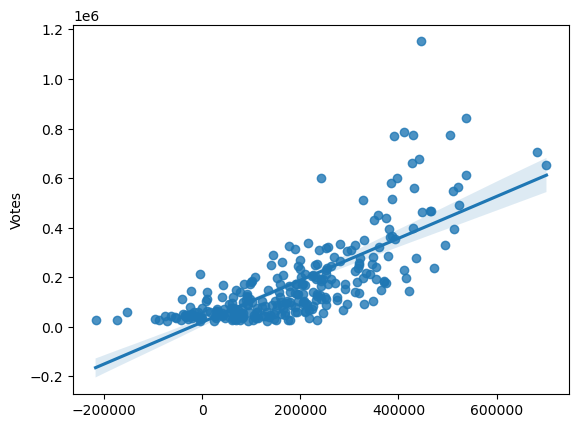

In [103]:
model(Ridge())

R2 Score:  -12.93575549611521
R2 Score on training data:  -12.705758053971273
MAE:  113632.4919499461
MSE:  34078362366.15919
RMSE:  184603.2566510114
Mean of Cross_validation_scorec:  -0.44858952805296176
Cross_validation_score:  [-0.71734519 -0.3495629  -0.1565488  -0.04121209 -0.97827866]


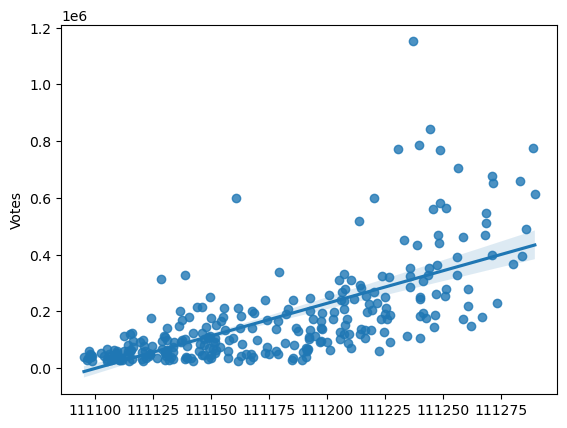

In [104]:
model(SVR())

Model performance results:

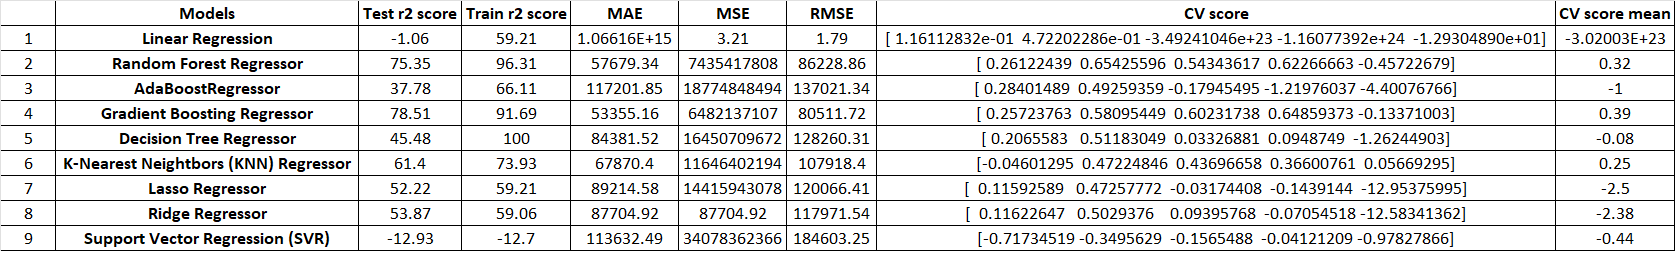

By observing, we can state that:

* Linear Regression:
    * Negative R2 on the test data indicates a poor fit of the linear regression model to your data.
    * Extremely high MAE and MSE values suggest that the model's predictions are far off from the actual values.The coefficient magnitudes indicate numerical instability or scaling issues.
    * Cross-validation scores are extremely low, indicating poor generalization.

* Random Forest Regressor:
     *  Random Forest is performing quite well in terms of R2 on the test data and train-test score gap which is (20.96).
     *  MAE and MSE values are reasonable, suggesting that the model is making fairly accurate predictions.
     *  Cross-validation scores are relatively consistent.

* AdaBoostRegressor:
     * R2 values indicate moderate performance, but the model doesn't seem to capture the variance well.
     * High MAE and MSE values show that the predictions are quite far from actual values.
     * The model's performance might be improved with further hyperparameter tuning.

* Gradient Boosting Regressor:
     * The Gradient Boosting model is showing good R2 on the test data, gap between train and test scores is (13.18).
     * Which states it performin better than RandomForestRegressro.
     * MAE and MSE values are better than some other models, indicating reasonably accurate predictions.
     * Cross-validation scores are also relatively consistent.

* Decision Tree Regressor:
     * The Decision Tree model seems to be overfitting, as indicated by a high R2 on the training data but very value on the test data (54.52).
     * High MAE and MSE values suggest that the model's predictions are not accurate.

* K-Nearest Neighbors (KNN) Regressor:
     * KNN has performed decently, with a reasonable R2 score on the test data.
     * MAE and MSE values are relatively high compared to other models, suggesting room for improvement.

* Lasso and Ridge Regressors:
     * Both Lasso and Ridge Regressors have similar performance in terms of R2 scores.
     * High MAE and MSE values show that the models' predictions are not very accurate.

* Support Vector Regression (SVR):
     * Negative R2 values indicate that the SVR model is not capturing the relationships well.
     * Extremely high MAE, MSE, and RMSE values suggest that the model's predictions are far from the actual values.
     * Cross-validation scores are consistently low.

After evaluation of the performance of all the models, we can say that the Gradient Boosting Regressor is the best performing model, though it may be overfitting slightly.

Hyperparameter Tuning

In [105]:
parameters_gbr = {
    'n_estimators': [10, 20,50],
    'criterion': ['friedman_mse', 'absolute_error'],
    'max_features': ['auto','sqrt','log2'],
    'loss':['ls','lad','huber'],
    'subsample':[1,0.1,0.5],
    'learning_rate':[0.01,0.1],
    'max_depth':[3,6],
    'min_samples_split':[10,50],
    'min_samples_leaf':[5,10,20],
    'min_impurity_decrease':[0.0,0.2],
    'random_state': [10, 20],
    'warm_start': [True, False],
    'ccp_alpha':[0.01,0.5]
}

In [106]:
gsv = GridSearchCV(GradientBoostingRegressor(),parameters_gbr,n_jobs=-1)
gsv.fit(x_train, y_train)
print(gsv.best_params_)

{'ccp_alpha': 0.01, 'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 6, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 50, 'n_estimators': 50, 'random_state': 10, 'subsample': 1, 'warm_start': True}


In [107]:
Hyper_gbr = GradientBoostingRegressor(ccp_alpha=0.01,criterion='friedman_mse',subsample=1,min_impurity_decrease=0.0, n_estimators=50, min_samples_split=50, min_samples_leaf=5, max_features='auto', max_depth=6, loss='huber', learning_rate=0.1,random_state=10,warm_start=True)

R2 Score:  79.17741204905802
R2 Score on training data:  89.54103029927131
MAE:  53689.8890507693
MSE:  6283215572.218224
RMSE:  79266.7368586485
Mean of Cross_validation_scorec:  0.22752595837966597
Cross_validation_score:  [ 0.18851552  0.6148548   0.55432503  0.66690666 -0.88697221]


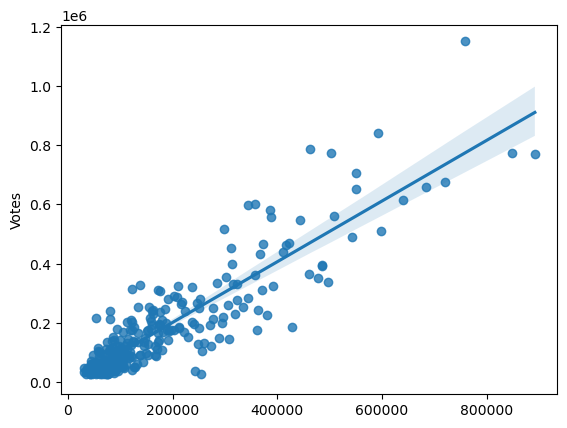

In [108]:
model(Hyper_gbr)

GradientBoostingRegressor is our best performing model at R2_score 79.17.

In [109]:
#Saving our model
import joblib
joblib.dump(Hyper_gbr,'Imdb Movie Votes Prediction model.pkl')

['Imdb Movie Votes Prediction model.pkl']

In [110]:
model=joblib.load('Imdb Movie Votes Prediction model.pkl')
Prediction=model.predict(x_test)
Prediction

array([463037.37021408,  88450.50621708,  60297.81284364,  48876.10867248,
       308282.47003249,  80660.7527337 ,  43287.24388871,  44163.08397304,
        80323.12159323, 157629.57172005, 153545.32422406, 323549.19180966,
        91458.58847139, 100481.07606682, 173659.60769182, 503025.29575709,
        83608.46810967, 120903.36111296, 361144.6451428 , 119801.63971471,
       148792.65746624, 104539.62085941, 155796.89958432, 105999.75198016,
       178961.96235439,  53682.02131039,  83451.1025881 , 357104.4639511 ,
        31383.71240195, 343946.59954593,  72257.02977745,  53169.46437566,
       100502.14965451, 311123.37097161, 121178.59859096,  72274.07398182,
       416798.81866298, 386516.38225875,  53921.68171633,  71830.34235628,
        98010.73960249, 252704.12209366, 218563.19710682,  90552.01042884,
       550153.11890158,  45984.33386259, 443217.31604983, 410601.52655077,
       163242.76521047,  91840.97110534,  92751.38255339,  90576.3385222 ,
       319338.48987458,  

In [111]:
Comparison=pd.DataFrame()
Comparison['True Value']=y_test
Comparison['Prediciton']=Prediction
Comparison

,True Value,Prediciton
264,786844,463037.370214
1178,142593,88450.506217
801,99714,60297.812844
459,90051,48876.108672
93,144151,308282.470032
...,...,...
40,676069,720790.621910
402,364961,460954.546982
252,328402,137309.134344
1319,42381,58301.920313


# Model 1: - Imdb Movie Gross Collection Prediction model.pkl
# Model 2: - Imdb Movie Votes Prediction model.pkl